In [1]:
#read train data
import pandas as pd
original_train_data = pd.read_csv('../original_data/test_X.csv')

c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd
from scipy.interpolate import interp1d
#find the columns which are numeric
numeric_columns = original_train_data.select_dtypes(include='number').columns

# interpolate the missing values
for column in numeric_columns:

    original_train_data[column] = original_train_data[column].interpolate(method='linear', limit_direction='both')

for column in original_train_data.columns:

    if original_train_data[column].isnull().any():

        value_counts = original_train_data[column].value_counts()

        most_frequent_value = value_counts.idxmax()

        original_train_data[column] = original_train_data[column].fillna(most_frequent_value)
# original_train_data.to_csv("preprocessed_train_X.csv", index=False)
# print(original_train_data.head())
print("Work done!")

c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Work done!


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#use one-hot encoding for categorical features
original_train_data = pd.get_dummies(original_train_data)
#use standardization for numeric features

numeric_columns = original_train_data.select_dtypes(include='number').columns
scaler = StandardScaler()
original_train_data[numeric_columns] = scaler.fit_transform(original_train_data[numeric_columns])
#print the standardized data's mean and std
# print(original_train_data[numeric_columns].mean())
# print(original_train_data[numeric_columns].std())

# print(original_train_data.head())
print("Work done!")
# original_train_data.to_csv("preprocessed_train_X.csv", index=False)

Work done!


In [4]:
#use one-hot encoding for categorical features
original_train_data = pd.get_dummies(original_train_data).astype(float)
# print(original_train_data.head())
print("Work done!")

Work done!


In [5]:
original_train_data.to_csv("../preprocessed_data/preprocessed_test_X.csv", index=False)

In [6]:
preprocessed_train_X = pd.read_csv('../preprocessed_data/preprocessed_test_X.csv')

In [8]:
selected_features = ['hospital_id', 'age', 'bmi', 'height', 'icu_id', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'heart_rate_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob']
# print(selected_features)
print("Work done!")


Work done!


In [9]:
#use the selected features to train the model
selected_train_X = original_train_data[selected_features]
selected_train_X.to_csv("../preprocessed_data/selected_test_X.csv", index=False)


encounter_id                               0
patient_id                                 0
hospital_id                                0
age                                        0
bmi                                        0
                                          ..
apache_2_bodysystem_Renal/Genitourinary    0
apache_2_bodysystem_Respiratory            0
apache_2_bodysystem_Trauma                 0
apache_2_bodysystem_Undefined Diagnoses    0
apache_2_bodysystem_Undefined diagnoses    0
Length: 121, dtype: int64


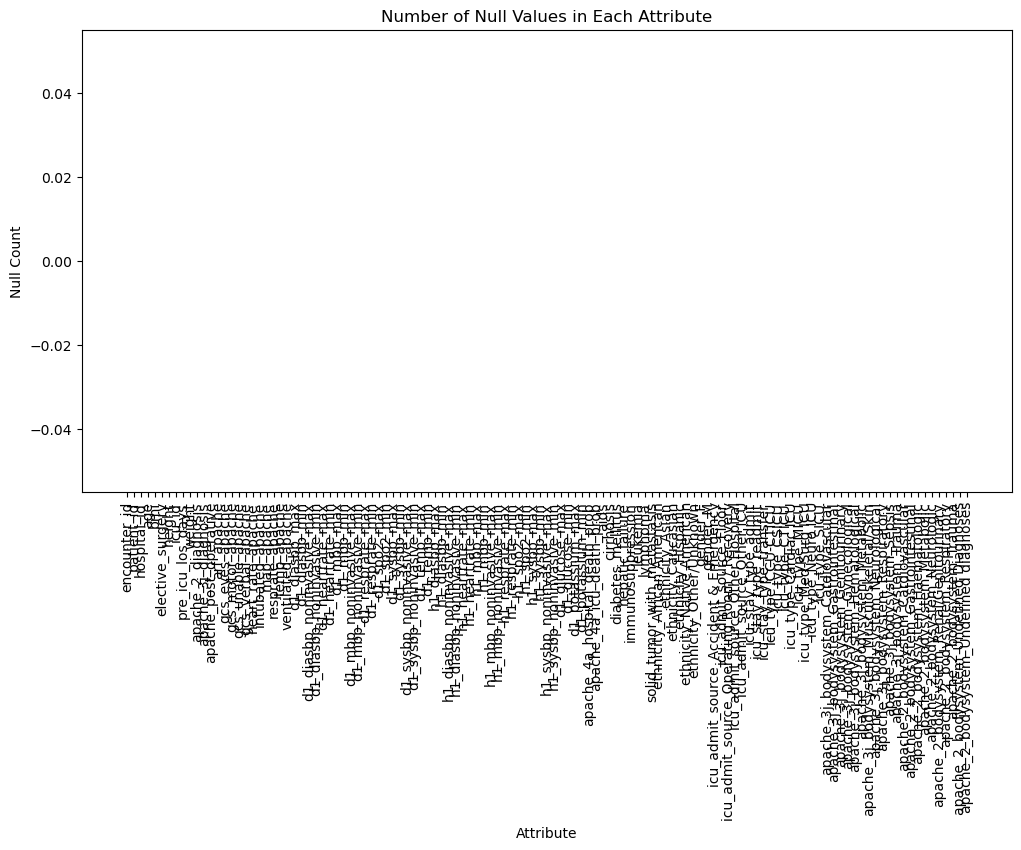

In [10]:
#count the row number that has null value
null_counts_per_row = original_train_data.isnull().sum(axis=0)
print(null_counts_per_row)
#draw the histogram of each row's count that has null value
ull_counts_df = pd.DataFrame({'Attribute': null_counts_per_row.index, 'NullCount': null_counts_per_row.values})
import matplotlib.pyplot as plt
null_counts_df = pd.DataFrame({'Attribute': null_counts_per_row.index, 'NullCount': null_counts_per_row.values})
plt.figure(figsize=(12, 6))
plt.bar(null_counts_df['Attribute'], null_counts_df['NullCount'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Number of Null Values in Each Attribute')
plt.xlabel('Attribute')
plt.ylabel('Null Count')
plt.show()